In [1]:
!pip install gdown==4.6.0

  Attempting uninstall: gdown
    Found existing installation: gdown 5.2.0
    Uninstalling gdown-5.2.0:
      Successfully uninstalled gdown-5.2.0


In [2]:
import gdown
!mkdir -p content/data
# Download all files
file_ids = [
    '1JXdyh-UVveXhBToLJj8ZJNttiJif6zH8',  # X_train
    '1rtyLyNDBr3sPcyElMhpDPK3qTbNZH1YT',  # X_test
    '1IkNvEhPFfano0qSDZFWhsmpF3ttC1q0Y',  # y_train
    '1JlMWumYQP9OIH79dVsCiZ-eavZAhgSzv'   # y_test
]

file_paths = [
    'content/data/X_train.csv',
    'content/data/X_test.csv',
    'content/data/y_train.csv',
    'content/data/y_test.csv'
]
for file_id, file_path in zip(file_ids, file_paths):
    gdown.download(f'https://drive.google.com/uc?id={file_id}', file_path, quiet=False)

Downloading...
From: https://drive.google.com/uc?id=1JXdyh-UVveXhBToLJj8ZJNttiJif6zH8
To: /content/content/data/X_train.csv
100%|██████████| 5.03M/5.03M [00:00<00:00, 206MB/s]
Downloading...
From: https://drive.google.com/uc?id=1rtyLyNDBr3sPcyElMhpDPK3qTbNZH1YT
To: /content/content/data/X_test.csv
100%|██████████| 1.34M/1.34M [00:00<00:00, 156MB/s]
Downloading...
From: https://drive.google.com/uc?id=1IkNvEhPFfano0qSDZFWhsmpF3ttC1q0Y
To: /content/content/data/y_train.csv
100%|██████████| 16.9k/16.9k [00:00<00:00, 26.2MB/s]
Downloading...
From: https://drive.google.com/uc?id=1JlMWumYQP9OIH79dVsCiZ-eavZAhgSzv
To: /content/content/data/y_test.csv
100%|██████████| 4.24k/4.24k [00:00<00:00, 7.76MB/s]


In [2]:
# Đọc file CSV
import pandas as pd
df_x_train = pd.read_csv('content/data/X_train.csv')
df_x_test = pd.read_csv('content/data/X_test.csv')
df_y_train = pd.read_csv('content/data/y_train.csv')
df_y_test = pd.read_csv('content/data/y_test.csv')

# Hiển thị thông tin và cột
print("\n🟦 X_train:")
print(df_x_train.info())
print("Tên cột:", df_x_train.columns.tolist())

print("\n🟨 X_test:")
print(df_x_test.info())
print("Tên cột:", df_x_test.columns.tolist())

print("\n🟩 y_train:")
print(df_y_train.info())
print("Tên cột:", df_y_train.columns.tolist())

print("\n🟥 y_test:")
print(df_y_test.info())
print("Tên cột:", df_y_test.columns.tolist())



🟦 X_train:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8457 entries, 0 to 8456
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   message  8445 non-null   object
dtypes: object(1)
memory usage: 66.2+ KB
None
Tên cột: ['message']

🟨 X_test:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2115 entries, 0 to 2114
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   message  2114 non-null   object
dtypes: object(1)
memory usage: 16.7+ KB
None
Tên cột: ['message']

🟩 y_train:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8457 entries, 0 to 8456
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   category  8457 non-null   int64
dtypes: int64(1)
memory usage: 66.2 KB
None
Tên cột: ['category']

🟥 y_test:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2115 entries, 0 to 2114
Data columns (total 1 columns

In [3]:
# 1. Import các thư viện cần thiết
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
import nltk
import string
import re

# 2. Tải dữ liệu từ nltk
nltk.download('punkt_tab')
nltk.download('wordnet')
nltk.download('omw-1.4')

# 3. Đọc dữ liệu từ file CSV
# df_x_train = pd.read_csv('path_to_X_train.csv')
# df_x_test = pd.read_csv('path_to_X_test.csv')
# df_y_train = pd.read_csv('path_to_y_train.csv')
# df_y_test = pd.read_csv('path_to_y_test.csv')

# 4. Xử lý dữ liệu đầu vào
df_x_train['message'] = df_x_train['message'].fillna('')
df_x_test['message'] = df_x_test['message'].fillna('')

X_raw = df_x_train['message']
y = df_y_train['category']

# 5. Mã hóa nhãn
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# 6. Hàm tiền xử lý văn bản
lemmatizer = WordNetLemmatizer()

def preprocess(text):
    text = text.lower()
    text = re.sub(r'\d+', '', text)
    text = text.translate(str.maketrans('', '', string.punctuation))
    tokens = word_tokenize(text)
    lemmatized = [lemmatizer.lemmatize(token) for token in tokens if token.isalpha()]
    return ' '.join(lemmatized)

df_x_train['message'] = df_x_train['message'].apply(preprocess)
df_x_test['message'] = df_x_test['message'].apply(preprocess)

# 7. Chuyển sang Bag of Words
vectorizer = CountVectorizer(max_features=17, stop_words='english')
X_train_bow = vectorizer.fit_transform(df_x_train['message'])
X_test_bow = vectorizer.transform(df_x_test['message'])

# 8. Scale dữ liệu
scaler = StandardScaler(with_mean=False)
X_train_scaled = scaler.fit_transform(X_train_bow)
X_test_scaled = scaler.transform(X_test_bow)

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


Best KNN Parameters: {'metric': 'cosine', 'n_neighbors': 17}
Accuracy: 0.8893617021276595
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.97      0.93      1566
           1       0.89      0.66      0.76       549

    accuracy                           0.89      2115
   macro avg       0.89      0.81      0.84      2115
weighted avg       0.89      0.89      0.88      2115



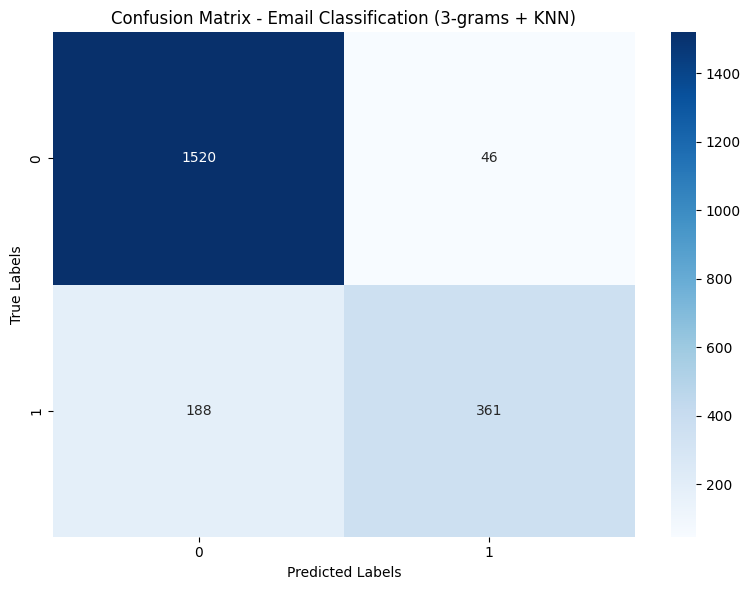

In [14]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Vector hóa với Bag of Words sử dụng 3-grams
vectorizer = CountVectorizer(max_features=6000, stop_words='english', ngram_range=(1, 3))
X_train_bow = vectorizer.fit_transform(df_x_train['message'])
X_test_bow = vectorizer.transform(df_x_test['message'])

# 2. Scale dữ liệu (cần thiết với một số metric)
scaler = StandardScaler(with_mean=False)  # with_mean=False vì BoW thường là sparse matrix
X_train_scaled = scaler.fit_transform(X_train_bow)
X_test_scaled = scaler.transform(X_test_bow)

# 3. Mã hóa nhãn
le = LabelEncoder()
y_train_encoded = le.fit_transform(df_y_train['category'])
y_test_encoded = le.transform(df_y_test['category'])

# 4. Huấn luyện KNN với khoảng cách cosine (không cần brute nếu sklearn >= 1.2)
param_grid = {
    'n_neighbors': [17],
    'metric': ['cosine']
}
knn = KNeighborsClassifier()
grid = GridSearchCV(knn, param_grid, cv=3, scoring='accuracy', n_jobs=-1)
grid.fit(X_train_scaled, y_train_encoded)

# 5. Dự đoán và đánh giá
y_pred = grid.best_estimator_.predict(X_test_scaled)

# In kết quả
print("Best KNN Parameters:", grid.best_params_)
print("Accuracy:", accuracy_score(y_test_encoded, y_pred))
print("Classification Report:\n", classification_report(
    le.inverse_transform(y_test_encoded),
    le.inverse_transform(y_pred)
))

# 6. Vẽ biểu đồ Confusion Matrix
cm = confusion_matrix(y_test_encoded, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=le.classes_, yticklabels=le.classes_)
plt.title('Confusion Matrix - Email Classification (3-grams + KNN)')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.tight_layout()
plt.show()


Best KNN Parameters: {'metric': 'cosine', 'n_neighbors': 17}
Accuracy: 0.8978723404255319
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.96      0.93      1566
           1       0.87      0.71      0.78       549

    accuracy                           0.90      2115
   macro avg       0.89      0.84      0.86      2115
weighted avg       0.90      0.90      0.89      2115



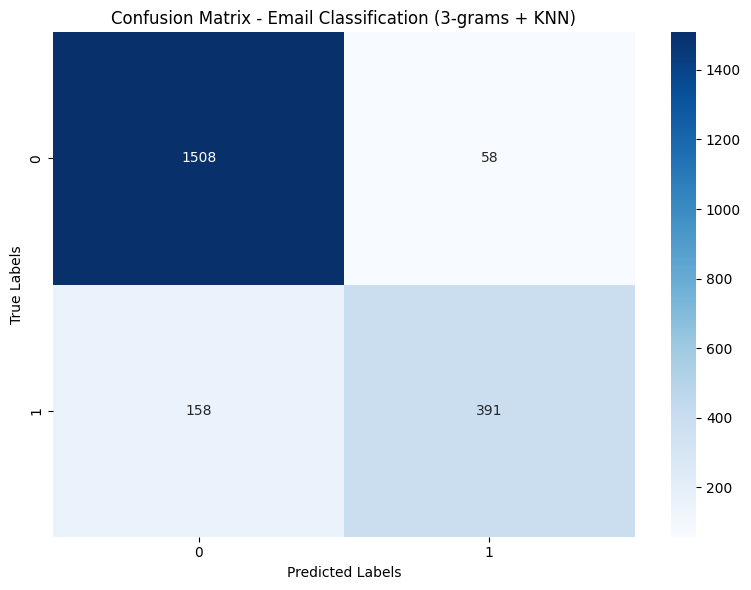

In [15]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# 1. TF-IDF vectorization với 3-grams
vectorizer = TfidfVectorizer(max_features=6000, stop_words='english', ngram_range=(1, 3))
X_tfidf = vectorizer.fit_transform(df_x_train['message'])

# 2. Scale dữ liệu
scaler = StandardScaler(with_mean=False)
X_train_scaled = scaler.fit_transform(X_tfidf)
X_test_tfidf = vectorizer.transform(df_x_test['message'])
X_test_scaled = scaler.transform(X_test_tfidf)

# 3. Mã hóa nhãn
le = LabelEncoder()
y_train_encoded = le.fit_transform(df_y_train['category'])
y_test_encoded = le.transform(df_y_test['category'])

# 4. Huấn luyện KNN với khoảng cách cosine (metric='cosine') và n_neighbors=17
param_grid = {
    'n_neighbors': [17],
    'metric': ['cosine']
}

# Tạo và huấn luyện mô hình GridSearchCV với KNN
grid = GridSearchCV(KNeighborsClassifier(), param_grid, cv=3, scoring='accuracy', n_jobs=-1)
grid.fit(X_train_scaled, y_train_encoded)

# 5. Dự đoán và tính accuracy
y_pred = grid.best_estimator_.predict(X_test_scaled)

# In kết quả
print("Best KNN Parameters:", grid.best_params_)
print("Accuracy:", accuracy_score(y_test_encoded, y_pred))
print("Classification Report:\n", classification_report(
    le.inverse_transform(y_test_encoded),
    le.inverse_transform(y_pred)
))

# 6. Vẽ biểu đồ Confusion Matrix
cm = confusion_matrix(y_test_encoded, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=le.classes_, yticklabels=le.classes_)
plt.title('Confusion Matrix - Email Classification (3-grams + KNN)')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.tight_layout()
plt.show()


In [17]:
!pip install --upgrade --force-reinstall "numpy==1.26.0"  "scipy==1.11.4" "thinc==8.2.2" "spacy==3.7.4" "gensim==4.3.2" "tensorflow==2.18.0"

  Using cached numpy-1.26.0-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (58 kB)
  Using cached scipy-1.11.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (60 kB)
  Using cached spacy-3.7.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (27 kB)
  Using cached gensim-4.3.2-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (8.3 kB)
  Using cached tensorflow-2.18.0-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (4.1 kB)
  Using cached blis-0.7.11-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (7.4 kB)
  Using cached murmurhash-1.0.12-cp311-cp311-manylinux_2_5_x86_64.manylinux1_x86_64.manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (2.1 kB)
  Using cached cymem-2.0.11-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (8.5 kB)
  Using cached preshed-3.0.9-cp311-cp311-manylinux_2_5_x86_64.manylinux1_x86_64.manylinux_2_17_x86_64.manylinux2014_

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


Best KNN Parameters: {'metric': 'cosine', 'n_neighbors': 17}
Accuracy: 0.9361702127659575
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.94      0.96      1566
           1       0.84      0.92      0.88       549

    accuracy                           0.94      2115
   macro avg       0.91      0.93      0.92      2115
weighted avg       0.94      0.94      0.94      2115



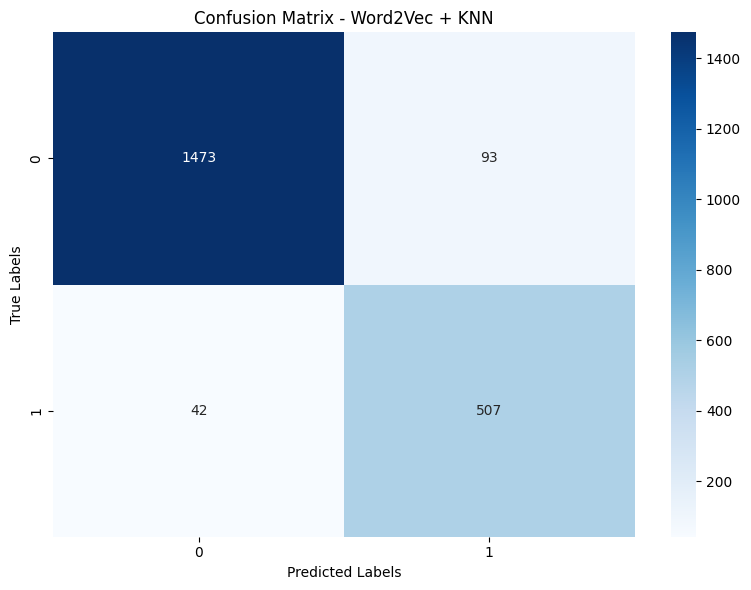

In [10]:
# 1. Import các thư viện cần thiết
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
import nltk
import string
import re
from gensim.models import Word2Vec

# 2. Tải dữ liệu từ nltk
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')

# 3. Giả sử dữ liệu đã được tải vào df_x_train, df_x_test, df_y_train, df_y_test
# df_x_train = pd.read_csv('path_to_X_train.csv')
# df_x_test = pd.read_csv('path_to_X_test.csv')
# df_y_train = pd.read_csv('path_to_y_train.csv')
# df_y_test = pd.read_csv('path_to_y_test.csv')

# 4. Xử lý dữ liệu đầu vào
df_x_train['message'] = df_x_train['message'].fillna('')
df_x_test['message'] = df_x_test['message'].fillna('')

X_raw = df_x_train['message']
y = df_y_train['category']

# 5. Mã hóa nhãn
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# 6. Hàm tiền xử lý văn bản
lemmatizer = WordNetLemmatizer()

def preprocess(text):
    text = text.lower()  # Chuyển về chữ thường
    text = re.sub(r'\d+', '', text)  # Xóa số
    text = text.translate(str.maketrans('', '', string.punctuation))  # Xóa dấu câu
    tokens = word_tokenize(text)  # Tokenize văn bản
    lemmatized = [lemmatizer.lemmatize(token) for token in tokens if token.isalpha()]  # Lemmatize từ
    return lemmatized

# Áp dụng tiền xử lý trên dữ liệu huấn luyện và kiểm tra
df_x_train['tokens'] = df_x_train['message'].apply(preprocess)
df_x_test['tokens'] = df_x_test['message'].apply(preprocess)

# 7. Huấn luyện mô hình Word2Vec
model = Word2Vec(sentences=df_x_train['tokens'], vector_size=300, window=5, min_count=2, workers=4, sg=1)



# 8. Hàm chuyển văn bản thành vector trung bình của các từ trong văn bản
def vectorize_text(text):
    vec = np.zeros(300)  # Khởi tạo vector 0 với kích thước 300
    count = 0
    for word in text:
        if word in model.wv:
            vec += model.wv[word]
            count += 1
    if count > 0:
        vec /= count  # Trung bình các vector của các từ
    return vec

# 9. Áp dụng vectorization cho toàn bộ dữ liệu
X_train_vec = np.array([vectorize_text(text) for text in df_x_train['tokens']])
X_test_vec = np.array([vectorize_text(text) for text in df_x_test['tokens']])

# 10. Scale dữ liệu
scaler = StandardScaler(with_mean=False)
X_train_scaled = scaler.fit_transform(X_train_vec)
X_test_scaled = scaler.transform(X_test_vec)

# 11. Huấn luyện mô hình KNN
param_grid = {
    'n_neighbors': [17],
    'metric': ['cosine']
}

knn = KNeighborsClassifier()
grid = GridSearchCV(knn, param_grid, cv=3, scoring='accuracy', n_jobs=-1)
grid.fit(X_train_scaled, y_encoded)

# 12. Dự đoán và đánh giá mô hình
y_pred = grid.best_estimator_.predict(X_test_scaled)

# 13. In kết quả
print("Best KNN Parameters:", grid.best_params_)
print("Accuracy:", accuracy_score(y_test_encoded, y_pred))  # Dùng y_test_encoded thay vì y_encoded
print("Classification Report:\n", classification_report(le.inverse_transform(y_test_encoded), le.inverse_transform(y_pred)))

# 14. Vẽ biểu đồ Confusion Matrix
cm = confusion_matrix(y_test_encoded, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
plt.title('Confusion Matrix - Word2Vec + KNN')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.tight_layout()
plt.show()
